In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import numpy as np

## <b> Load Datasets </b>

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

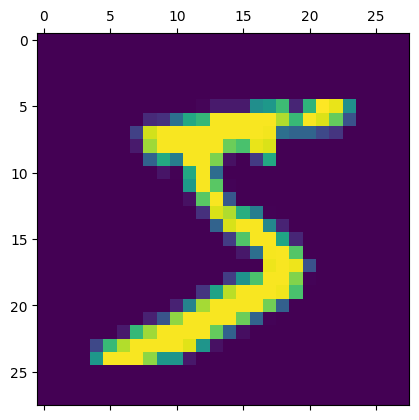

In [ ]:
plt.matshow(X_train[0])

## <b> Pre-processing </b>

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4721 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2717 - accuracy: 0.9248


[0.271688312292099, 0.9247999787330627]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.84013133e-02, 4.70978534e-07, 6.90088049e-02, 9.53206539e-01,
       2.60403613e-03, 2.10106865e-01, 1.55415137e-06, 9.99786556e-01,
       1.02535814e-01, 7.07985222e-01], dtype=float32)

In [ ]:
y_pred_classes= [np.argmax(pred) for pred in y_predicted]
print(y_pred_classes[:5])
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

[7, 2, 1, 0, 4]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.94      0.88      0.91      1010
           4       0.92      0.94      0.93       982
           5       0.85      0.91      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.90      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



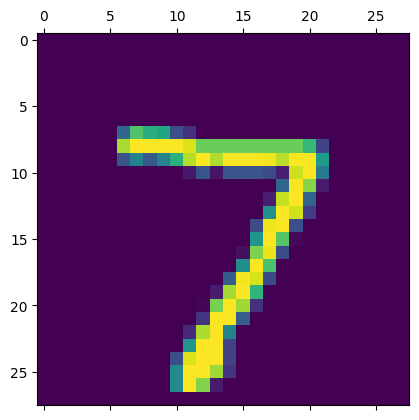

In [ ]:
plt.matshow(X_test[0])

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    7,    6,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    9,  921,   14,   10,    7,   13,   11,   40,    4],
       [   3,    0,   17,  887,    0,   55,    3,   13,   26,    6],
       [   1,    1,    4,    1,  923,    0,   10,    4,   10,   28],
       [   7,    2,    2,   13,   10,  812,   13,    2,   26,    5],
       [   8,    3,    4,    0,    8,   15,  913,    2,    5,    0],
       [   1,    5,   23,    2,    7,    1,    0,  949,    3,   37],
       [   7,    6,    6,   16,    9,   41,    8,   10,  864,    7],
       [   8,    7,    2,    7,   34,   11,    0,   23,    6,  911]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

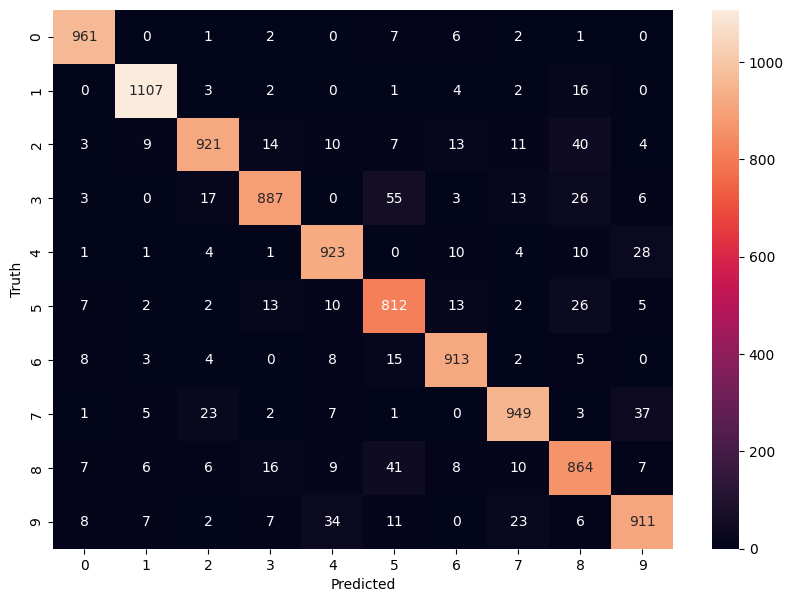

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1234 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0858 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0498 - accuracy: 0.9850


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9780


[0.07542350143194199, 0.9779999852180481]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_pred_classes= [np.argmax(pred) for pred in y_predicted]
print(y_pred_classes[:5])
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
[7, 2, 1, 0, 4]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(95.72222222222221, 0.5, 'Truth')

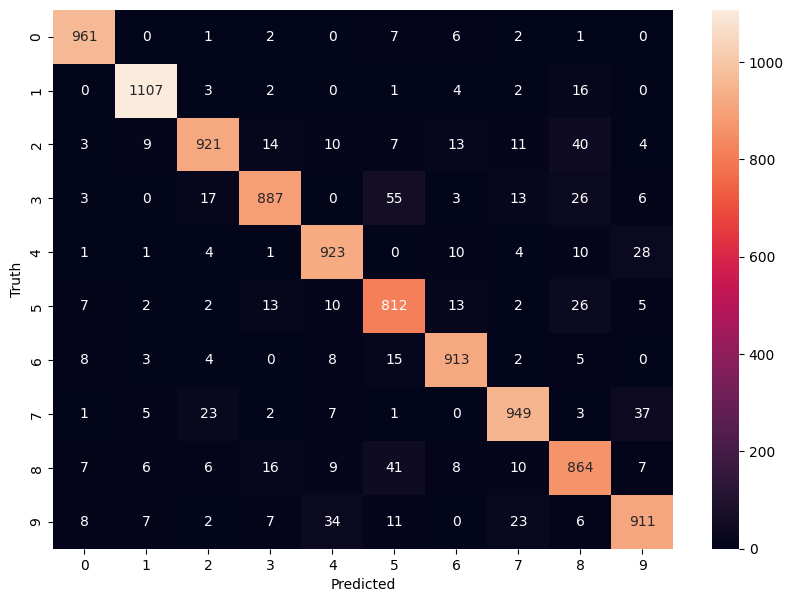

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


## **ANN**

In [ ]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2743 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9640
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0856 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0275 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9802


[0.06817138940095901, 0.9801999926567078]

In [ ]:
y_predicted = ann.predict(X_test)
y_pred_classes= [np.argmax(pred) for pred in y_predicted]
print(y_pred_classes[:5])
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
[7, 2, 1, 0, 4]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.97      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## <font color= "blue"><b>
Using Flatten layer so that we don't have to call .reshape on input dataset
<b></font>

In [ ]:
modelflatten = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

modelflatten.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

modelflatten.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2721 - accuracy: 0.9230
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1208 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0846 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0656 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9837


In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [ ]:
modelflatten.get_weights()

[array([[-0.03742693,  0.00093585, -0.05528617, ...,  0.01970434,
         -0.0407727 , -0.08186812],
        [-0.00225209,  0.04990257, -0.01645048, ..., -0.00814474,
         -0.07852561, -0.03105566],
        [ 0.06060953,  0.05164979,  0.02308272, ..., -0.05016578,
         -0.01960089, -0.00958636],
        ...,
        [ 0.00737136, -0.07772006, -0.07231963, ..., -0.07390608,
          0.07714486,  0.04941644],
        [-0.01235874, -0.06299083, -0.00085347, ...,  0.04903844,
         -0.03074201,  0.03943096],
        [-0.01773184, -0.06149808, -0.0739608 , ...,  0.0624814 ,
         -0.04204315, -0.07190205]], dtype=float32),
 array([-0.05133862,  0.12927376,  0.05023883,  0.17652075, -0.02792467,
        -0.10552094,  0.0138765 ,  0.07478806,  0.15338229,  0.00889415,
         0.00715278,  0.18179503,  0.01623652, -0.09310847,  0.081903  ,
         0.01249267, -0.01165429,  0.04575551, -0.0436112 , -0.10899087,
        -0.07723604, -0.07734407, -0.12975901, -0.02834013,  0.065

## <b>CNN</b>

In [ ]:
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
print(y_train)

[5 0 4 ... 5 6 8]


In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=56, kernel_size=(4, 4), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(56, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1336 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0424 - accuracy: 0.9869
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0288 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0157 - accuracy: 0.9946
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0135 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 57s 31m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9919


[0.034074217081069946, 0.9919000267982483]

In [ ]:
y_predicted = cnn.predict(X_test)
y_pred_classes= [np.argmax(pred) for pred in y_predicted]
print(y_pred_classes[:5])
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
[7, 2, 1, 0, 4]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

